In [131]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [132]:
temp = np.array([50,50,50,70,70,70,80,80,80,90,90,90,100,100,100])
yield_data = np.array([3.3,2.8,2.9,2.3,2.6,2.1,2.5,2.9,2.4,3.0,3.1,2.8,3.3,3.5,3.0])

In [133]:
df = pd.DataFrame({'Temperature':temp,"Yield":yield_data})
df

,Temperature,Yield
0,50,3.3
1,50,2.8
2,50,2.9
3,70,2.3
4,70,2.6
5,70,2.1
6,80,2.5
7,80,2.9
8,80,2.4
9,90,3.0


In [134]:
df.to_csv("temp_yield_data.csv",index=False)

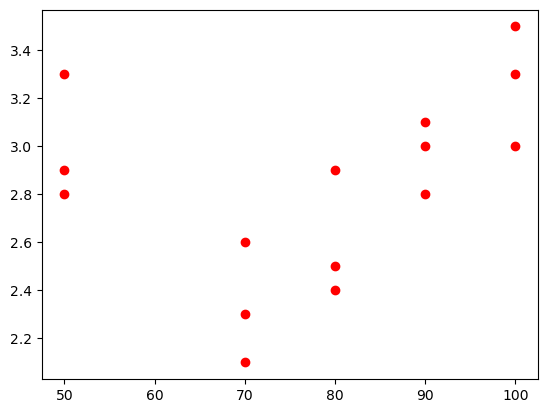

In [135]:
x = temp
y = yield_data
plt.scatter(x,y,color='red')
plt.show()   

### Linear Regression

In [136]:
mean_x = np.mean(x)
mean_y = np.mean(y)

In [137]:
B1 = np.sum((x-mean_x)*(y-mean_y)) / np.sum((x-mean_x)**2)
B0 = mean_y - B1*mean_x
print("Intercept : ",B1)
print("Slope : ",B0)

Intercept :  0.006756756756756758
Slope :  2.306306306306306


In [138]:
y_pred = B0 + B1*x
print(y_pred)

[2.64414414 2.64414414 2.64414414 2.77927928 2.77927928 2.77927928
 2.84684685 2.84684685 2.84684685 2.91441441 2.91441441 2.91441441
 2.98198198 2.98198198 2.98198198]


In [139]:
mse = np.mean((y-y_pred)**2)
rmse = np.sqrt(mse)
print("MSE : ",mse)
print("RMSE : ",rmse)

MSE :  0.13270870870870877
RMSE :  0.36429206511905904


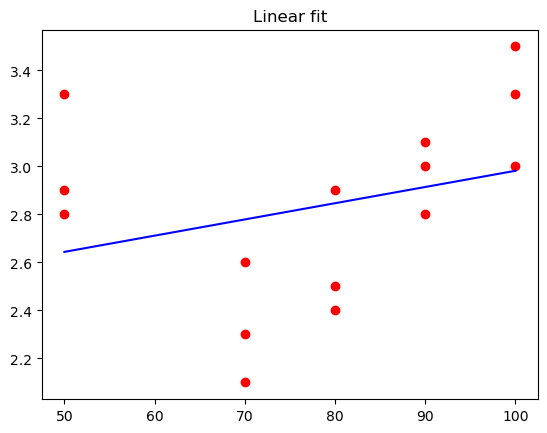

In [140]:
plt.scatter(x,y,color='red')
plt.plot(x,y_pred,color='blue')
plt.title("Linear fit")
plt.show()

### Polynomial Regression

In [141]:
degree = 2
x_poly = np.column_stack([x**i for i in range(degree+1)])
B = np.linalg.inv(x_poly.T @ x_poly) @ (x_poly.T @ y)

In [142]:
y_pred = x_poly @ B
print(y_pred)

[2.96391753 2.96391753 2.96391753 2.47113402 2.47113402 2.47113402
 2.54742268 2.54742268 2.54742268 2.83883162 2.83883162 2.83883162
 3.34536082 3.34536082 3.34536082]


In [143]:
mse = np.mean((y-y_pred)**2)
rmse = np.sqrt(mse)
print("MSE : ",mse)
print("RMSE : ",rmse)

MSE :  0.04778465063001146
RMSE :  0.21859700508015076


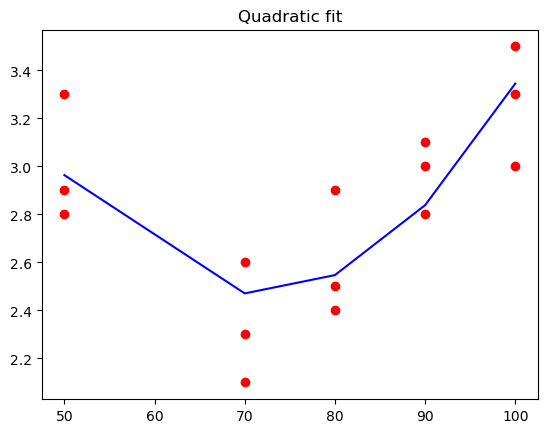

In [144]:
plt.scatter(x,y,color='red')
plt.plot(x,y_pred,color='blue')
plt.title("Quadratic fit")
plt.show()

### Question 2

In [145]:
df2 = pd.read_csv('w4q2.csv')
df2

,Infarc,Area,Group,X2,X3
0,0.119,0.34,3,0,0
1,0.190,0.64,3,0,0
2,0.395,0.76,3,0,0
3,0.469,0.83,3,0,0
4,0.130,0.73,3,0,0
5,0.311,0.82,3,0,0
6,0.418,0.95,3,0,0
7,0.480,1.06,3,0,0
8,0.687,1.20,3,0,0
9,0.847,1.47,3,0,0


In [146]:
x = df2[['Area', 'Group', 'X2', 'X3']]
y = df2['Infarc']

In [147]:
x = np.hstack((np.ones((x.shape[0], 1)),x))
beta = np.linalg.inv(x.T @ x) @ x.T @ y

print("Coefficients (β):", beta)

Coefficients (β): [ 2.4106875  -2.29393959 -0.15276563  0.164875    0.19164063]


In [148]:
y_pred = x @ beta
y_pred

array([ 1.17245116,  0.48426929,  0.20899653,  0.04842076,  0.27781472,
        0.07136016, -0.22685199, -0.47918534, -0.80033689, -1.41970058,
        1.41346345,  0.65646339,  0.35825124, -0.03171849,  0.10591789,
        0.06003909, -0.23817305, -0.35287003, -0.32993064, -0.37580943,
        0.15179668,  0.53046339, -0.1118397 , -0.13477909, -0.04302151,
        0.02579668,  0.07167547, -0.27241547, -0.52474882, -0.43299124,
       -0.50180943, -0.91471856])

In [149]:
errors = y - y_pred
mse = np.mean(errors**2)
rmse = np.sqrt(mse)
print("Errors : ",errors)
print("MSE : ",mse)
print("RMSE : ",rmse)

Errors :  0    -1.053451
1    -0.294269
2     0.186003
3     0.420579
4    -0.147815
5     0.239640
6     0.644852
7     0.959185
8     1.487337
9     2.266701
10   -1.351463
11   -0.534463
12   -0.325251
13    0.133718
14    0.100082
15    0.188961
16    0.458173
17    0.651870
18    0.679931
19    0.725809
20    0.436203
21   -0.151463
22    0.260840
23    0.450779
24    0.433022
25    0.403203
26    0.405325
27    0.711415
28    0.970749
29    0.970991
30    1.126809
31    1.888719
Name: Infarc, dtype: float64
MSE :  0.6970504534086814
RMSE :  0.8348954745407843


In [150]:
data=pd.read_csv('w4q2.csv')

X = data[['Area', 'X2', 'X3']]
y = data['Infarc']

X = np.c_[np.ones(X.shape[0]), X]


X_transpose = X.T
X_transpose_X = X_transpose @ X
X_transpose_X_inv = np.linalg.pinv(X_transpose_X)
X_transpose_y = X_transpose @ y
beta = X_transpose_X_inv @ X_transpose_y

intercept, risk_coef, early_cooling_coef, late_cooling_coef = beta
print("Coefficients:")
print(f"Intercept: {intercept:.4f}")
print(f"Risk Area Coefficient: {risk_coef:.4f}")
print(f"Early Cooling Coefficient: {early_cooling_coef:.4f}")
print(f"Late Cooling Coefficient: {late_cooling_coef:.4f}")

y_pred = X @ beta

residuals = y - y_pred

mse = np.mean(residuals**2)
rmse = np.sqrt(mse)

print("\nError Metrics:")
print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")

Coefficients:
Intercept: -0.1345
Risk Area Coefficient: 0.6127
Early Cooling Coefficient: -0.2435
Late Cooling Coefficient: -0.0657

Error Metrics:
Mean Squared Error (MSE): 0.0170
Root Mean Squared Error (RMSE): 0.1305


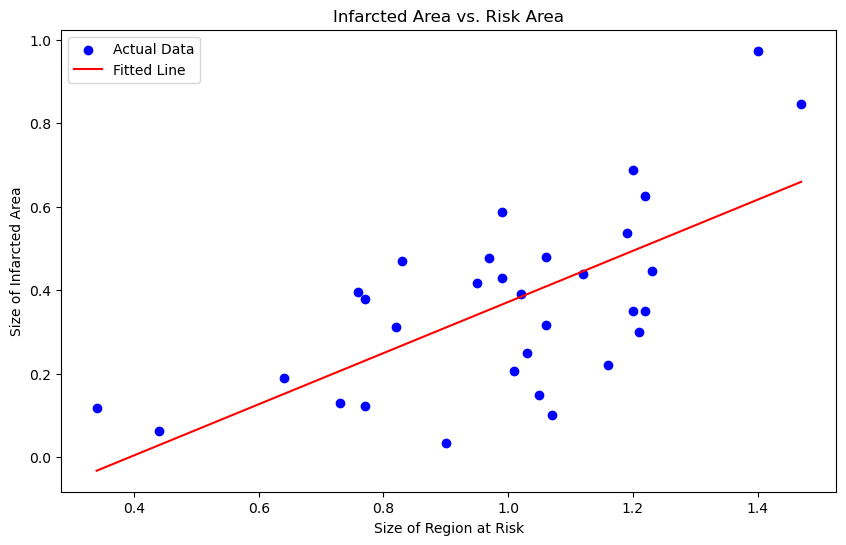

In [151]:
plt.figure(figsize=(10, 6))

plt.scatter(data['Area'], y, color='blue', label='Actual Data')


mean_early_cooling = np.mean(data['X2'])
mean_late_cooling = np.mean(data['X3'])
risk_area_range = np.linspace(data['Area'].min(), data['Area'].max(), 100)
fit_line = intercept + risk_coef * risk_area_range + early_cooling_coef * mean_early_cooling + late_cooling_coef * mean_late_cooling

plt.plot(risk_area_range, fit_line, color='red', label='Fitted Line')
plt.xlabel('Size of Region at Risk')
plt.ylabel('Size of Infarcted Area')
plt.title('Infarcted Area vs. Risk Area')
plt.legend()
plt.show()